# Imports

In [100]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering #library for the 3 types of cluster imported
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler #normalization data 
from sklearn.linear_model import LinearRegression

#import operator
import operator

#import spicy
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram

# Load Data

In [314]:
df_redwine = pd.read_csv("winequality-red.csv")
df_whitewine = pd.read_csv("winequality-white.csv")
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [315]:
df_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Randomly remove a percentage of the values

In [259]:
#Randomly remove 10%, 20%, and 30% of the values of the features of each dataset
def random_delete(dataset, percentage): 
    rows = len(dataset)
    cols = len(dataset.columns)
    total_fields = rows * cols
    rm_fields = int(total_fields * percentage) #remove a certain number of fields accodingly to the percentage
    
    # randomly generate index locations for the new NaNs
    indices = np.random.randint(total_fields, size=rm_fields)
    row_indices = indices % rows
    col_indices = (indices / rows).astype(int)

    #assign NaN to each of the indices in data
    for i, j in zip(row_indices, col_indices):
        dataset.iloc[i, j] = np.nan
        
    return dataset

In [260]:
random_delete(df_whitewine, 0.1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,NaN,0.36,20.7,NaN,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,NaN,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,NaN,0.36,NaN,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,NaN,NaN,0.99254,2.99,NaN,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,NaN,7.0


In [261]:
df_whitewine.isnull().sum() / len(df_whitewine)

fixed acidity           0.096366
volatile acidity        0.092283
citric acid             0.094324
residual sugar          0.097795
chlorides               0.097795
free sulfur dioxide     0.095753
total sulfur dioxide    0.094120
density                 0.091466
pH                      0.094733
sulphates               0.092487
alcohol                 0.089833
quality                 0.100245
dtype: float64

# Handle Missing Values

In [262]:
df_whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4426 non-null   float64
 1   volatile acidity      4446 non-null   float64
 2   citric acid           4436 non-null   float64
 3   residual sugar        4419 non-null   float64
 4   chlorides             4419 non-null   float64
 5   free sulfur dioxide   4429 non-null   float64
 6   total sulfur dioxide  4437 non-null   float64
 7   density               4450 non-null   float64
 8   pH                    4434 non-null   float64
 9   sulphates             4445 non-null   float64
 10  alcohol               4458 non-null   float64
 11  quality               4407 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [245]:
#first strategie -> imputation

def imputation(dataset): 
    updated_dataset = dataset
    updated_dataset = updated_dataset.fillna('10')
    updated_dataset.info()

In [246]:
imputation(df_whitewine)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         4898 non-null   object
 1   volatile acidity      4898 non-null   object
 2   citric acid           4898 non-null   object
 3   residual sugar        4898 non-null   object
 4   chlorides             4898 non-null   object
 5   free sulfur dioxide   4898 non-null   object
 6   total sulfur dioxide  4898 non-null   object
 7   density               4898 non-null   object
 8   pH                    4898 non-null   object
 9   sulphates             4898 non-null   object
 10  alcohol               4898 non-null   object
 11  quality               4898 non-null   object
dtypes: object(12)
memory usage: 459.3+ KB


In [263]:
#second strategie -> Filling with a Regression Model
from sklearn.linear_model import LogisticRegression
def deleting_Row(dataset):
    updated_df = dataset.dropna(axis=0)

In [264]:
deleting_Row(df_whitewine)
df_whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4426 non-null   float64
 1   volatile acidity      4446 non-null   float64
 2   citric acid           4436 non-null   float64
 3   residual sugar        4419 non-null   float64
 4   chlorides             4419 non-null   float64
 5   free sulfur dioxide   4429 non-null   float64
 6   total sulfur dioxide  4437 non-null   float64
 7   density               4450 non-null   float64
 8   pH                    4434 non-null   float64
 9   sulphates             4445 non-null   float64
 10  alcohol               4458 non-null   float64
 11  quality               4407 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


# Data Nomalization

In [341]:
# normalization by applying the min-max scaling 
def normalizationData(data): 
    x = data.values #returns a numpy array
    #print(x)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data = pd.DataFrame(x_scaled, columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])
    return data


In [342]:
df_redwineNorm = normalizationData(df_redwine)
df_redwineNorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.315175,0.0,0.068493,0.106845,0.128571,0.098940,0.567548,0.606299,0.0,0.153846,0.4
1,0.283186,0.455253,0.0,0.116438,0.143573,0.328571,0.215548,0.494126,0.362205,0.0,0.215385,0.4
2,0.283186,0.455253,0.0,0.095890,0.133556,0.185714,0.169611,0.508811,0.409449,0.0,0.215385,0.4
3,0.584071,0.455253,0.0,0.068493,0.105175,0.214286,0.190813,0.582232,0.330709,0.0,0.215385,0.6
4,0.247788,0.455253,0.0,0.068493,0.106845,0.128571,0.098940,0.567548,0.606299,0.0,0.153846,0.4


In [343]:
df_whitewineNorm = normalizationData(df_whitewine)
df_whitewineNorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.212121,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.200000,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.236364,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.187879,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.187879,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


#  Data Discretization

In [155]:
def discretizationData(data): #variable
    data['bucket'] = pd.cut(data['quality'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])
    return data

In [274]:
df_redwineDisc = discretizationData(df_redwine)
df_redwineDisc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bucket
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Below_average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Below_average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Below_average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Below_average


In [275]:
df_whitewineDisc = discretizationData(df_whitewine)
df_whitewineDisc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bucket
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Average


# Data Reduction

Subset by columns 

In [168]:
df_redwine_subset = df_redwine[['quality', 'chlorides']]
df_redwine_subset.head()

,quality,chlorides
0,5,0.076
1,5,0.098
2,5,0.092
3,6,0.075
4,5,0.076


Subset by values of some specified column/filtering

In [171]:
acidity_7 = df_redwine[df_redwine['fixed acidity']>7]
acidity_7

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bucket
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Below_average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Below_average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Below_average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Below_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6,Average
1580,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,Average
1585,7.2,0.39,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6,Average
1586,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,Average


# K_MEANS

In [109]:
def k_means(wine_set):

    # standardize predictors to have mean=0 and standardeviation=1
    pred = wine_set[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates", "alcohol", "quality"]]
    clustervar = pred.copy()

    clustervar = pd.DataFrame(preprocessing.scale(clustervar))
    clustervar.columns = pred.columns

    # split into training and testing sets
    clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)
    # print(clus_train.shape)

    # k-means cluster analysis for 1-9 clusters
    clusters = range(1, 10)
    meandist = []

    for k in clusters:
        # print(k)
        model = KMeans(n_clusters=k)
        model.fit(clus_train)
        meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])

    print('Average distance from observations to the cluster centroids for 1-9 clusters:')
    print(meandist)

    # plot average distance from observations to the cluster centroid
    plt.plot(clusters, meandist)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')

    plt.show()


    #  2-cluster solution proven to be the best
    model2 = KMeans(n_clusters=2)
    model2.fit(clus_train)
    # plot clusters
    pca_2 = PCA(2)
    plot_columns = pca_2.fit_transform(clus_train)
    plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model2.labels_)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Canonical variables for 2 clusters')
    plt.show()

Average distance from observations to the cluster centroids for 1-9 clusters:
[3.1497710143972237, 2.8496922649978056, 2.72406378203171, 2.6523208935305638, 2.5644167594428957, 2.4975731311627585, 2.4437034376043956, 2.398895577942663, 2.351752831627552]


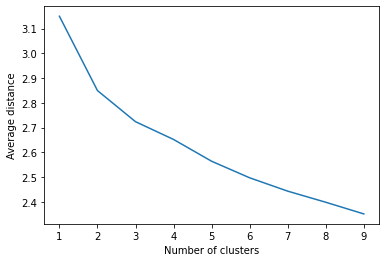

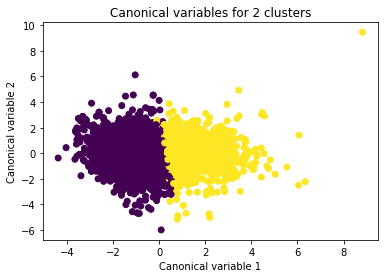

In [110]:
k_means(df_whitewine)

Average distance from observations to the cluster centroids for 1-9 clusters:
[3.1497710143972237, 2.8496922649978056, 2.7241050668792752, 2.652354841705701, 2.5644167594428957, 2.49755032955452, 2.444143542065124, 2.400024144917822, 2.35158725271883]


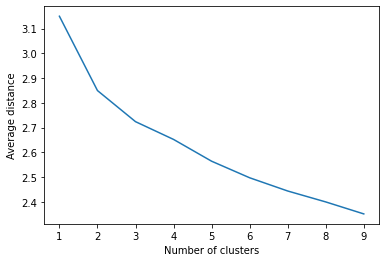

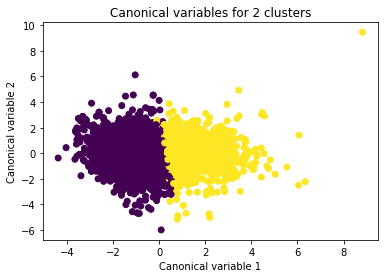

In [294]:
k_means(df_whitewineDisc)

Average distance from observations to the cluster centroids for 1-9 clusters:
[3.1553326516537474, 2.8579833372697716, 2.7341396781760485, 2.662881916947448, 2.57573437363613, 2.5103059468013247, 2.457893283229865, 2.4084656707214833, 2.3626285656411508]


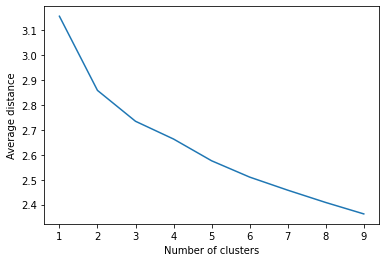

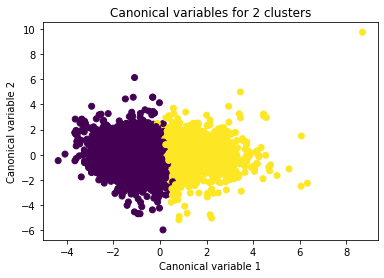

In [344]:
k_means(df_whitewineNorm)

Average distance from observations to the cluster centroids for 1-9 clusters:
[3.075808630591162, 2.7362066454351432, 2.5538647430405947, 2.457068479136751, 2.3514652291625793, 2.296509584978175, 2.214458281616739, 2.16361465079537, 2.1148518929319917]


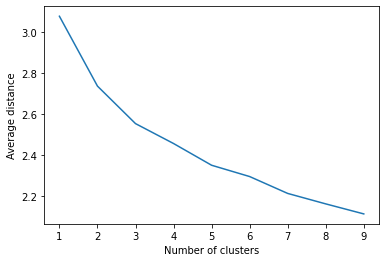

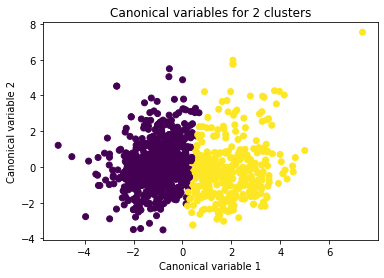

In [111]:
k_means(df_redwine)

# DBScan

In [349]:
def DBScan(dataset): 
    X = StandardScaler().fit_transform(dataset)
    db = DBSCAN(eps=3, min_samples=2).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 16
Silhouette Coefficient: 0.288


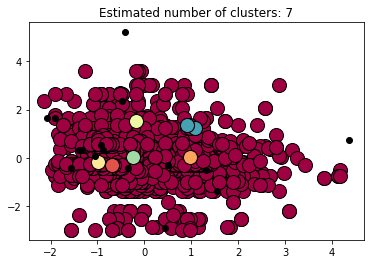

In [350]:
DBScan(df_redwine)

Estimated number of clusters: 7
Estimated number of noise points: 16
Silhouette Coefficient: 0.288


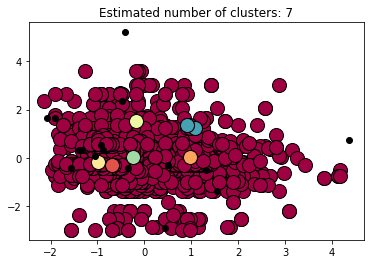

In [353]:
DBScan(df_redwineNorm)

Estimated number of clusters: 6
Estimated number of noise points: 30
Silhouette Coefficient: 0.305


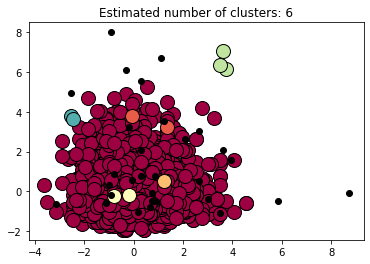

In [351]:
DBScan(df_whitewine)

Estimated number of clusters: 6
Estimated number of noise points: 30
Silhouette Coefficient: 0.305


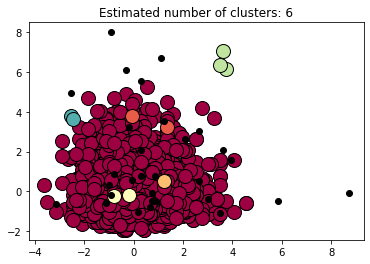

In [354]:
DBScan(df_whitewineNorm)

# Agglomerative hierarchical clustering

In [357]:
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

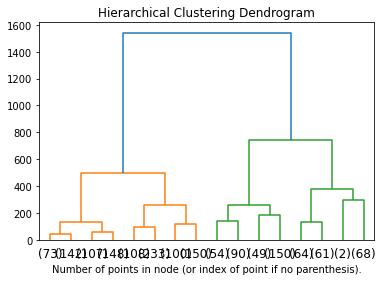

In [358]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
X= df_redwine
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

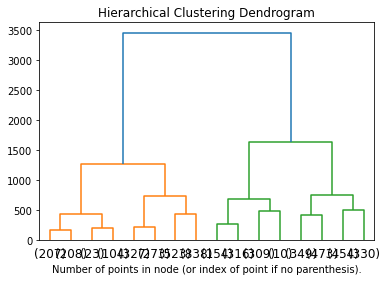

In [359]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
X= df_whitewine
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

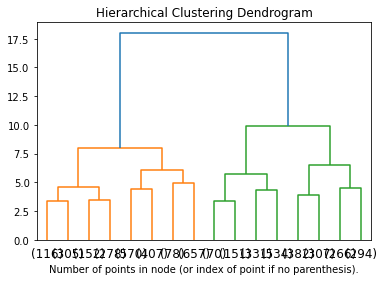

In [362]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
X= df_whitewineNorm
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()